<a href="https://colab.research.google.com/github/drstannwoji2019/SCM_Forecasting/blob/main/FbProphet_forecasting_PeytonManning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import pandas as pd
from prophet import Prophet

In [5]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [7]:
# fit the model
m = Prophet()
m.fit(df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxntpykak/vi2ved0h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxntpykak/cg6e4lgg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55195', 'data', 'file=/tmp/tmpxntpykak/vi2ved0h.json', 'init=/tmp/tmpxntpykak/cg6e4lgg.json', 'output', 'file=/tmp/tmpxntpykak/prophet_modelz22hubsh/prophet_model-20230504211654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:16:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:16:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [8]:
# make predictions
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [9]:
# Predictions with new columns
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.203190,7.414646,8.901795
3266,2017-01-16,8.528195,7.800129,9.248451
3267,2017-01-17,8.315591,7.581878,9.071153
3268,2017-01-18,8.148199,7.382950,8.877489
3269,2017-01-19,8.160106,7.402484,8.856067


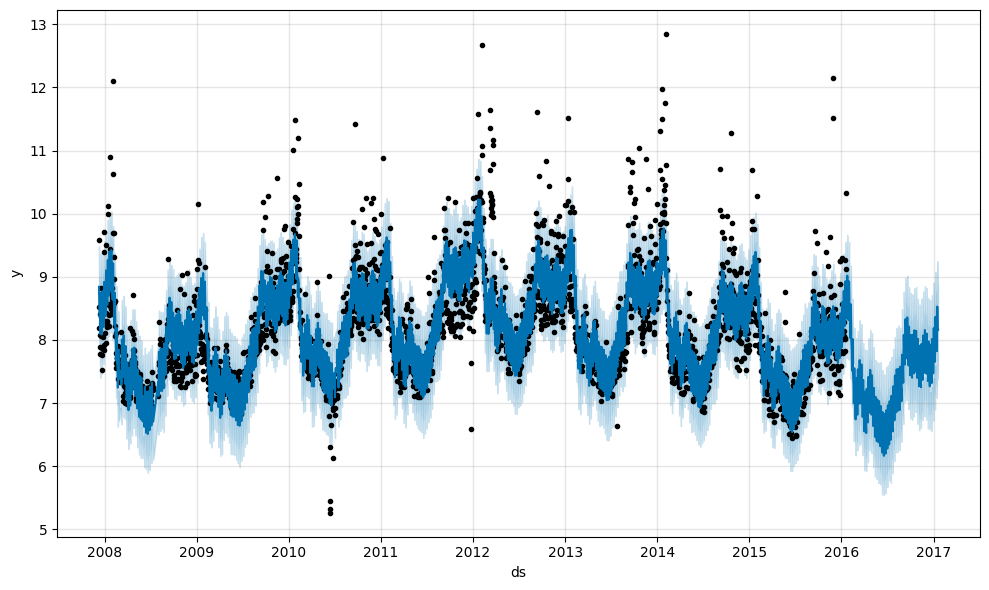

In [10]:
# Plot the prediction
fig1 = m.plot(forecast)

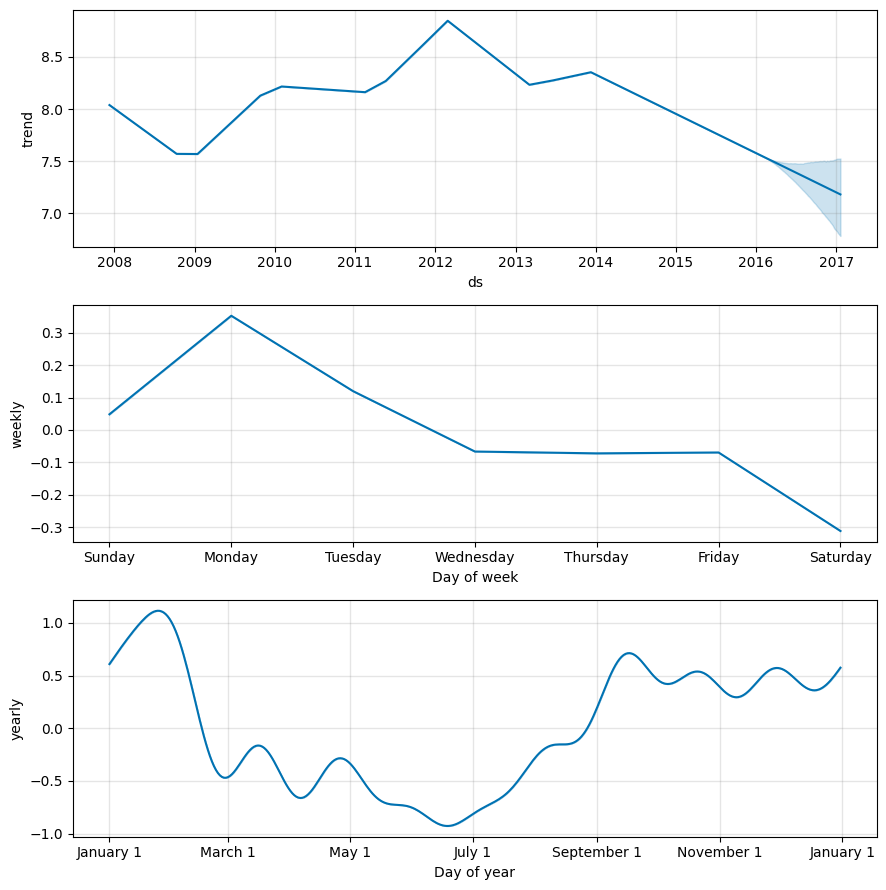

In [11]:
# Plot the forecast components
fig2 = m.plot_components(forecast)

In [12]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
!pip install notebook

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.3 MB/s eta 0:00:00


In [14]:
!pip install ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
# Create interactive figure of the forecast and its components
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [16]:
plot_components_plotly(m, forecast)